In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# THIS LINE MAKES PLOTS SHOW IN JUPYTER

In [46]:
'''

TO DO: understand what plt.subplots() is doing.

TO DO: Generate random number data sets and practice these
data.info()
data.describe()
data[:10]

TO DO: Generator expressions and their relationship to list comprehensions
    sets = (set(to_cat_list(x)) for x in data.CATEGORY)
    sorted(set.union(*sets))
    the difference between:
        return [x.split('.') for x in seq] 
        ....and 
        return (x.split(',') for x in seq)

fig = plt.figure() has to be in the same cell as subplot creation
ax1 = fig.add_subplot(2,2,1) - a 2 x 2 set of subplots and selects the first one. For some reason these are indexed [1 ... n] not [0 ... n-1]
ax1.plot()
ax2 = fig.add_subplot(2,2,2)
ax2.plot()

-- Plot a 1 x 1
    # Way #1
    fig, ax = plt.subplots(figsize=(20,10))
    ax.plot()
    
    #Way #2 -- variable name change is just for simplifict
    fig, axes = plt.subplots(figsize=(20,10), nrows=1)
    
    for i, ax in enumerate(fig.axes):
        ax.plot()
    
    
-- Get 1 plot for each aggregation level 

    fig, axes = plt.subplots(figsize = (16, 10*len(agg_level_values)), nrows= len(agg_level_values), sharey=False, sharex=True)
        for i, ax in enumerate(fig.axes):
            series_name = df.columns.get_level_values(agg_level)[i]
            ax.bar(diff_series.index, df[series_name], width=((1000)/len(df.index)), color=sns.color_palette()[i], align='center', tick_label=df.index)
            ax.set_title( '%s %s' % (series_name, dimension), fontsize=20)


-- Plot 2 x 3 normal distrituion with no space between plots
    fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(15, 15)) # figsize=(x,y)
    for i in range(2):
        for j in range(3):
            axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
        plt.subplots_adjust(wspace = 0, hspace = 0)
    # Adjust the size and space between plots 
        plt.subplots_adjust(left=0, bottom=0, right=2, top=2, wspace=0.5, hspace=0.5)

-- Lots of control over styling
    ax.plot(x, y, linestyle='--', color='g')

-- Plots are linearly interpoloated by default
    # Put dots on the points to make clear where they are
    plt.plot(data, linestyle='--', color='k', marker='o')
    
-- You can change the method of interpoloation with 'drawstyle'
    plt.plot(data, linestyle='-', color='k', drawstyle='steps-post', label='steps-post')
    
-- Plot Stylingin
    - Change tick locations
        ax.set_xticks(list)
    - Change tick label string
        ax.set_xtick_labels(list)
    - Set title
        ax.set_title('Title')
    - Set xlabel
        ax.set_xlabel('String')
    - Add a data label
        ax.plot(randn(1000).cumsum(), color='k', label='one')
    - Add a legend to an existing plot
        plt.legend(loc='best') # Prints with the data labels specified for all axes on the plot
        ax.legend(loc='best') # Prints with the data labels specified just for that ax
    - Text and Hack for text placement below the graph
        text_placement_below_plot = plt.ylim()[0]-((plt.ylim()[1]-plt.ylim()[0])/9)
        axes.text(0, text_placement_below_plot, 'Hello World', family='monospace', fontsize=10)

-- Standard shapes are called "patches".  They are stored in matplotlib.patches
    rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
    circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
    pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)

    ax.add_patch(rect)
    ax.add_patch(circ)
    ax.add_patch(pgon)

-- Saving plots to a file
    plt.savefig(fname = 'figpath.svg')  # fname is the default parameter if only 1 paramater is passed
    See Table 8-2 for all plt.savefig() parameters

-- Customize matplotlib through the matplotlibrb file in matplotlib/mpl-data
    You can set the default fonts, weights, colors, etc.

-- Pandas has a mature wrapper to matplotlib that makes it easy to plot dataframes and series
    generally, Series.plot() and df.plot().  
    See Tables 8.3 and 8.4 for a full list of Plot() method arguments
    This set of plots is a good example of the usage of several complex pieces:
 
        fig, axes = plt.subplots(2, 1)
        data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
        data.plot(kind='bar', ax=axes[0], color='k', alpha = 0.7)
        data.plot(kind='barh', ax=axes[1], color='k', alpha = 0.7)

-- pd.scatter_matrix() -- all scatter plots in a data set against each other.  Creates n x n grid.

-- Generators
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    return sorted(set.union(*cat_sets))

-- zip(array_1, array_2)
    Make an element-wise list of tuples out of the passed lists
    e.g. zip(np.zeros(5), np.random.ran(5)) will yield a list like:
        [(0, 0.425345),
        (0, 0.22345),
        (0, 0.987455),
        (0, 0.27827),
        (0, 0.24756)]
        
-- refresher on ix
    dummy_frame.ix[row, codes] = 1
    # row and codes can be lists!


'''

'\n\nTO DO: understand what plt.subplots() is doing.\n\nTO DO: Generate random number data sets and practice these\ndata.info()\ndata.describe()\ndata[:10]\n\nTO DO: Generators\n    sets = (set(to_cat_list(x)) for x in data.CATEGORY)\n    sorted(set.union(*sets))\n\nfig = plt.figure() has to be in the same cell as subplot creation\nax1 = fig.add_subplot(2,2,1) - a 2 x 2 set of subplots and selects the first one. For some reason these are indexed [1 ... n] not [0 ... n-1]\nax1.plot()\nax2 = fig.add_subplot(2,2,2)\nax2.plot()\n\n-- Plot a 1 x 1\n    # Way #1\n    fig, ax = plt.subplots(figsize=(20,10))\n    ax.plot()\n    \n    #Way #2 -- variable name change is just for simplifict\n    fig, axes = plt.subplots(figsize=(20,10), nrows=1)\n    \n    for i, ax in enumerate(fig.axes):\n        ax.plot()\n    \n    \n-- Get 1 plot for each aggregation level \n\n    fig, axes = plt.subplots(figsize = (16, 10*len(agg_level_values)), nrows= len(agg_level_values), sharey=False, sharex=True)\n    

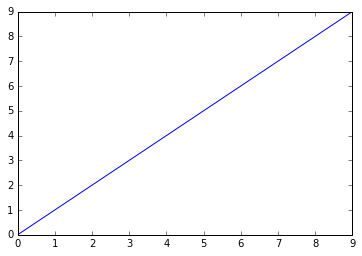

In [47]:
# Test that it works
plt.plot(np.arange(10))

In [48]:
# Plots reside within a "figure" object
fig = plt.figure()

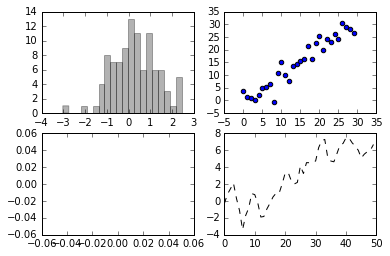

In [49]:
# Must create 1 or more subplots using add_subplot
# Creates a 2 x 2 figure, selecting the first of 4 subplots
# Note that plt.figure MUST be in the same figure
# Plot commands by default act on the most recent subplot defined.
# You can specify the subplots to act on as well

fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.plot()

ax2 = fig.add_subplot(2,2,2)
ax2.plot()

ax3 = fig.add_subplot(2,2,3)
ax3.plot()

ax4 = fig.add_subplot(2,2,4)
ax4.plot()

# Plot commands by default act on the most recent subplot defined.

from numpy.random import randn
plt.plot(randn(50).cumsum(), 'k--')

# You can specify the subplots to act on as well
ax1.hist(randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * randn(30))
# ax3 isn't used to call a scatter plot so is blank.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126f79950>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x116454750>]], dtype=object)

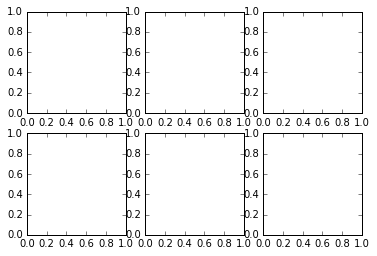

In [50]:
# plt.subplots(a, b) creates empty graphs in a x b configuration
# Its returned objects can be assigned to variables
# One of which is an array of a x b size
fig, axes = plt.subplots(2, 3)
axes # Creates an array with 2 elements, each containing 3 elements.

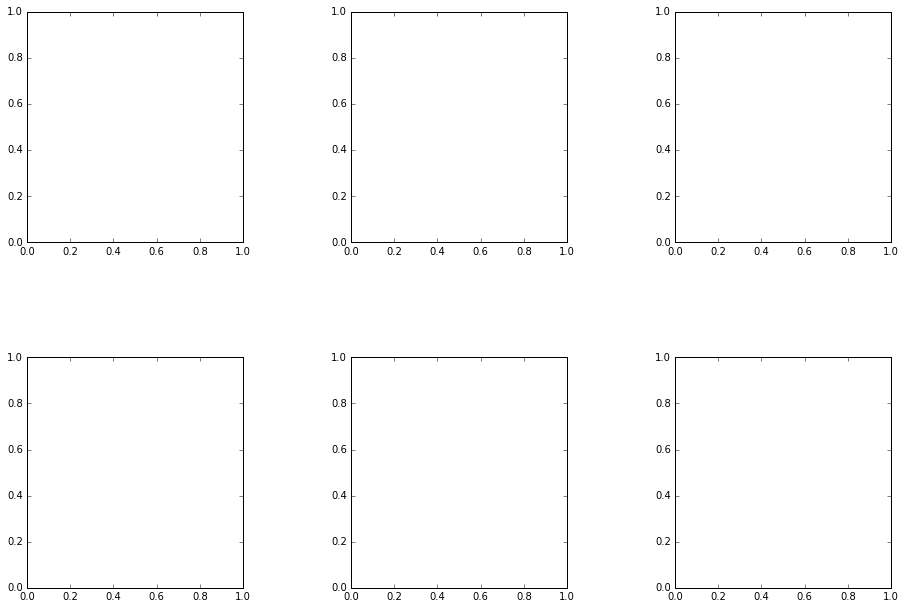

In [51]:
# Adjust the size and space between plots 
fig, axes = plt.subplots(2, 3)
plt.subplots_adjust(left=0, bottom=0, right=2, top=2, wspace=0.5, hspace=0.5)

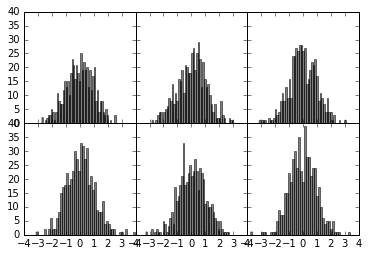

In [52]:
# Reducing space between subplots to 0 
# Note that the axes here overlap
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True)
for i in range(2):
    for j in range(3):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
    plt.subplots_adjust(wspace = 0, hspace = 0)

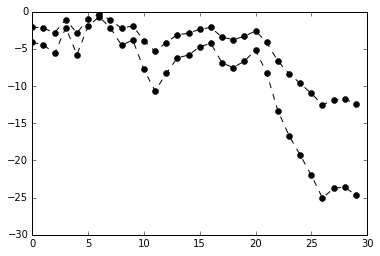

In [53]:
# Example of using esoteric shorthand totally opaquely
# THESE PLOT FUNCTIONS ARE PLOTTING THE SAME THING
# Note that matplotlib interpolates linearly between points by default
data = randn(30).cumsum()
plt.plot(data, linestyle='--', color='k', marker='o')
plt.plot(data*2, 'ko--')

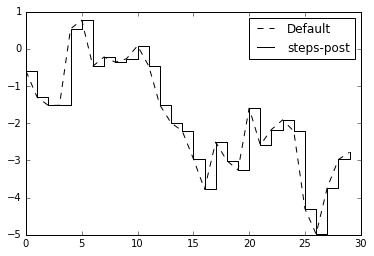

In [54]:
# Change the defaault method of interpolation
data = randn(30).cumsum()
plt.plot(data, linestyle='--', color='k', label='Default')
plt.plot(data, linestyle='-', color='k', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

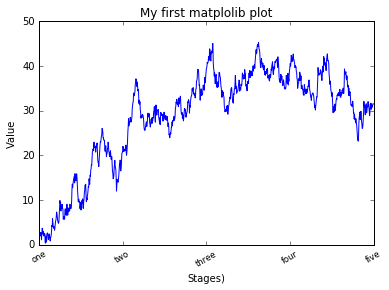

In [55]:
# Plot Axis and Tick Labeling
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation = 30, fontsize='small')
ax.set_title('My first matplolib plot')
ax.set_xlabel('Stages)')
ax.set_ylabel('Value')
#plt.xlim() # returns the current parameter value
#plt.xlim([0, 10]) # sets a new parameter value

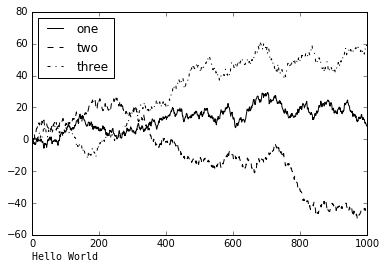

In [56]:
# Labeling, Legends, and Text
fig, axes = plt.subplots(1, 1)
a, b, c = randn(1000).cumsum(), randn(1000).cumsum(), randn(1000).cumsum()
min_value =  min(min(a), min(b), min(c))
min_value_placement = plt.ylim()[0]-((plt.ylim()[1]-plt.ylim()[0])/9)
#print min_value
axes.plot(a, color='k', label='one')
axes.plot(b, color='k', linestyle='--', label='two')
axes.plot(c, 'k', linestyle='-.',  label='three')
axes.text(0, plt.ylim()[0]-((plt.ylim()[1]-plt.ylim()[0])/9), 'Hello World', family='monospace', fontsize=10)
plt.legend(loc='best')

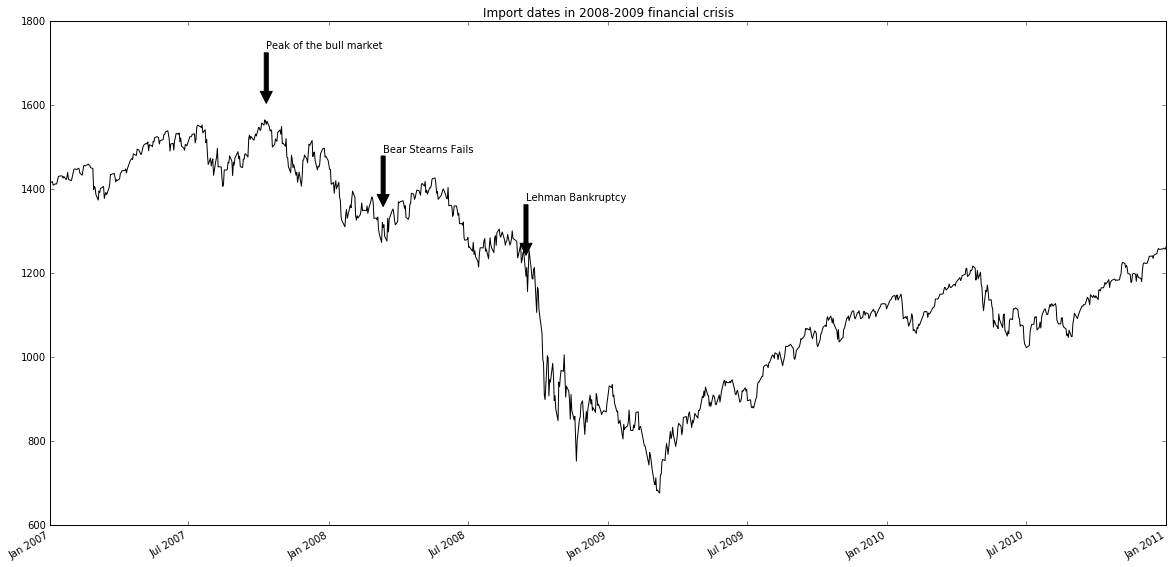

In [57]:
# Plot Annotations - Lines, Text in the Graph
from datetime import datetime 
fig, ax = plt.subplots(figsize=(20,10))

data = pd.read_csv('ch08/spx.csv', index_col=0, parse_dates = True)
spx = data['SPX']
spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of the bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

# Doing this annotation BEFORE setting limits on the axis ranges causes the graphing to fail because there are too many data points
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 50), xytext=(date, spx.asof(date) + 200),
                arrowprops=dict(facecolor='black'), horizontalalignment='left', verticalalignment='top')

ax.set_title('Import dates in 2008-2009 financial crisis')

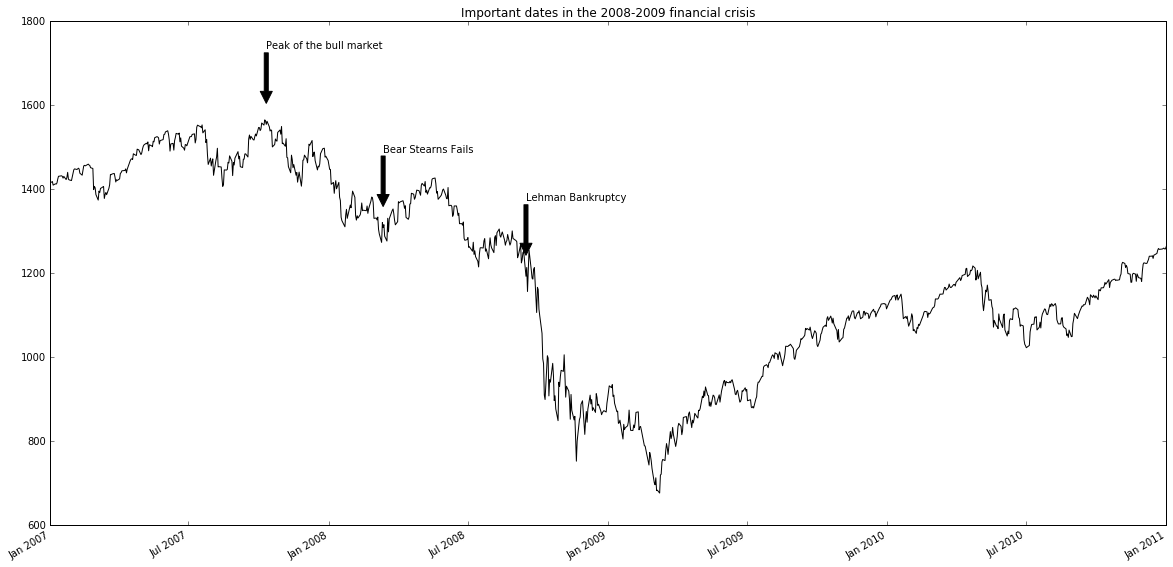

In [58]:
# Plot Annotations - Lines, Text in the Graph
# Uses a for loop to cycle through the fig.axes
from datetime import datetime 


#fig, ax = plt.subplots(figsize=(20,10))
fig, axes = plt.subplots(figsize=(20,10), nrows=1)

for i, ax in enumerate(fig.axes):
    data = pd.read_csv('ch08/spx.csv', index_col=0, parse_dates = True)
    spx = data['SPX']
    spx.plot(ax=ax, style='k-')

    crisis_data = [
        (datetime(2007, 10, 11), 'Peak of the bull market'),
        (datetime(2008, 3, 12), 'Bear Stearns Fails'),
        (datetime(2008, 9, 15), 'Lehman Bankruptcy')
    ]

    ax.set_xlim(['1/1/2007', '1/1/2011'])
    ax.set_ylim([600, 1800])

    # Doing this annotation BEFORE setting limits on the axis ranges causes the graphing to fail because there are too many data points
    for date, label in crisis_data:
        ax.annotate(label, xy=(date, spx.asof(date) + 50), xytext=(date, spx.asof(date) + 200),
                    arrowprops=dict(facecolor='black'), horizontalalignment='left', verticalalignment='top')
        
    ax.set_title('Important dates in the 2008-2009 financial crisis')
    

'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x05\xa0\x00\x00\x02\xd0\x08\x06\x00\x00\x00f%\xd7\x87\x00\x00\x00\x04sBIT\x08\x08\x08\x08|\x08d\x88\x00\x00\x00\tpHYs\x00\x00\x0b\x12\x00\x00\x0b\x12\x01\xd2\xdd~\xfc\x00\x00 \x00IDATx\x9c\xec\xddk\x8c\xddw}\xe7\xf1\xcf9c\xcf8\x99d\xc6Nl\x1c\xdb\xe3\\\xba\xe4F\x04\x82d\xc3Mf\xd7mwC\x17\xb1\xa5B\xab\x12U\xa8]\x96\x06\xb5\xd4\xaa\xd4G\xe5II\xd0\xf2`\x91h\xab\xb6\xa9\xaa\xaa\xaa\xdaJ\xbb5\xcb\xb2\xa8i\x1b\x82+\xd2\x18\xca\xb2l\xb4Di\xe8L\x86I\x80!9\x87\x12{l\x86\x93\xd83\xf1\x8c\xe7\xbf\x0f\xfe\xeb\x1b\xb6\xe3\xcb\xf8?\xffsy\xbd\xa4\x113\xf6\xc9\xe4K\xb1\xe7L\xdf\xe7;\xbf_\xa3(\x8a"\x00\x00\x00\x00\x00p\x855\xeb\x1e\x00\x00\x00\x00\x00\x80\xfe$@\x03\x00\x00\x00\x00P\t\x01\x1a\x00\x00\x00\x00\x80J\x08\xd0\x00\x00\x00\x00\x00TB\x80\x06\x00\x00\x00\x00\xa0\x12\x024\x00\x00\x00\x00\x00\x95\x10\xa0\x01\x00\x00\x00\x00\xa8\x84\x00\r\x00\x00\x00\x00@%\x04h\x00\x00\x00\x00\x00*!@\x03\x00\x00\x00\x00P\t\x01\x1a\x00\x00\x00\x00\x80J\x08\xd0\x00\x00\x00\x

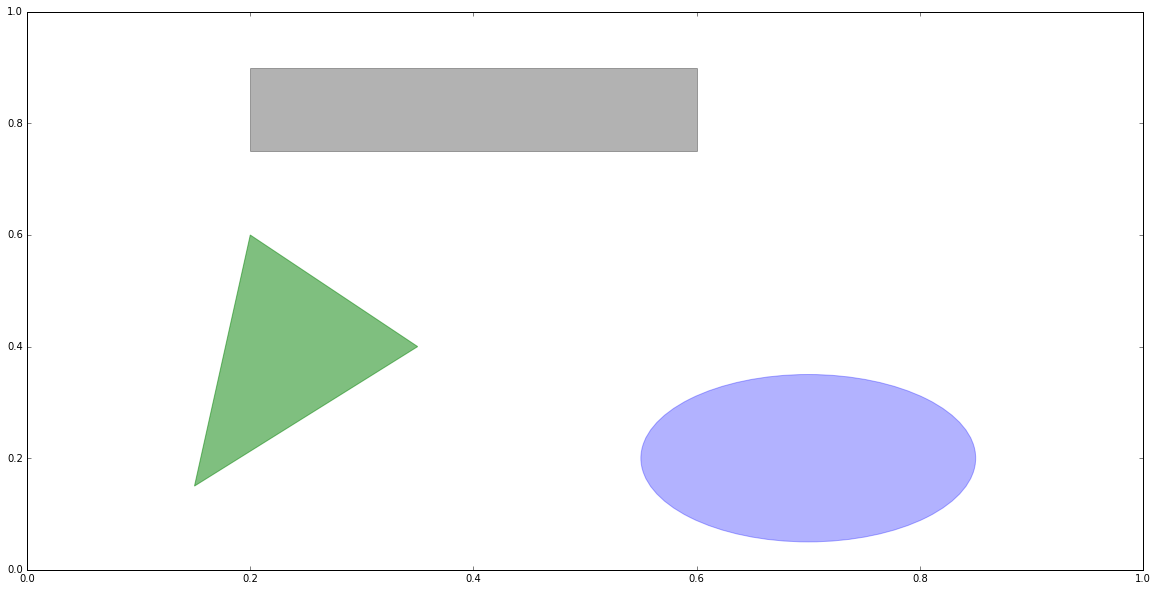

In [59]:
# Common Shapes -- these common ones are in matplotlib.pyplot but the full set is in matplotlib.patches
fig, ax = plt.subplots(figsize=(20, 10))
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)

# This is required to show the patches.
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

################################
# Saving plots to a file.
# The file extension sets the file type intuitively


plt.savefig('ch08/figpath.svg')
plt.savefig('ch08/figpath.png')
plt.savefig('ch08/figpath.pdf')

# plt.savefig takes parameters (see Chapter 8for full list)
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

# Can write to any file-like object
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()
plot_data # plot_data is a binary file so its printed output is basically nonsense, but it cane be streamed over the web

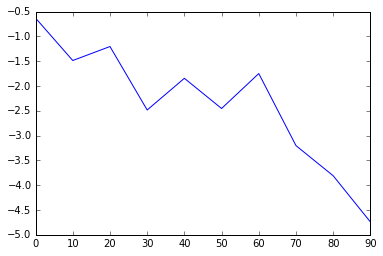

In [60]:
# Pandas Wrappers for matplotlib
# Useful for sending dataframes and series

s = pd.Series(np.random.randn(10).cumsum(), index = np.arange(0,100,10))
s.plot() # Defaults to line plot and uses the index as a category plot

array([[ 2.56630828,  0.13701976, -0.26460361,  0.85861472],
       [-0.19584489,  0.46690662,  2.85271147, -0.71360114],
       [-1.354931  , -0.13273615,  0.85304302, -0.69025085],
       [ 0.00701233, -0.75568383,  0.35271207, -0.27742558],
       [-0.0768177 ,  1.25695958,  1.54495178,  0.71776466],
       [ 0.01109307, -1.7315347 ,  0.75033343, -0.13764259],
       [-0.62246156,  1.90044416, -1.65401476,  0.61802933],
       [ 1.75767398, -0.70441221, -0.75597804, -0.55607209],
       [-2.16467731, -2.9844979 , -0.59610463, -1.31024426],
       [ 0.15310364,  0.80391339,  0.10798359, -0.89542109]])

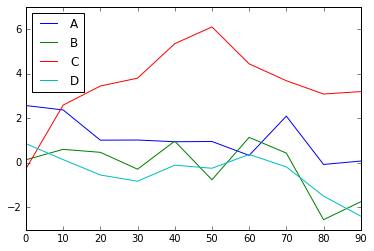

In [61]:
# See Tables 8.3 and 8.4 for a full list of Plot() method arguments
a = np.random.randn(10, 4)
df = pd.DataFrame(a.cumsum(0), columns=['A', 'B', 'C', 'D'], index=np.arange(0, 100, 10)) # cumsum(0) means along a particular axis. axis=0 --> sum over rows, hold columns stable
df.plot()
a

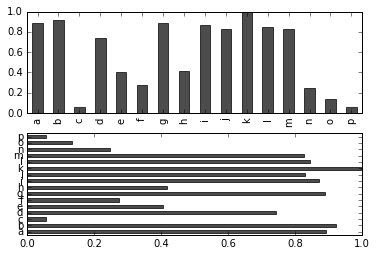

In [62]:
# kind is a Plot() method parameter
# How to use plt.subplots

fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot(kind='bar', ax=axes[0], color='k', alpha = 0.7)
data.plot(kind='barh', ax=axes[1], color='k', alpha = 0.7)

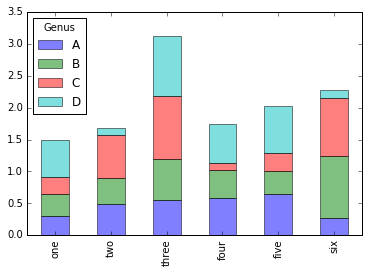

In [63]:
# Stacked bar plot example
df = pd.DataFrame(np.random.rand(6, 4), index=['one', 'two', 'three', 'four', 'five', 'six'], columns = pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df.plot(kind='Bar', stacked = True, alpha = 0.5)

In [64]:
# Make a stacked bar plot showing the percentage of data points for each party size on each day

day,Fri,Sat,Sun,Thur
size,,,,
1,1.0,2.0,0.0,1.0
2,16.0,53.0,39.0,48.0
3,1.0,18.0,15.0,4.0
4,1.0,13.0,18.0,5.0
5,0.0,1.0,3.0,1.0
6,0.0,0.0,1.0,3.0


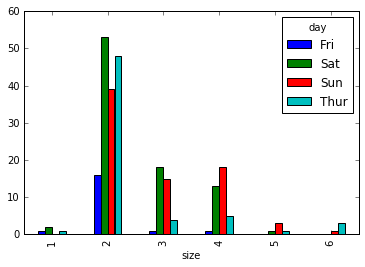

In [65]:
# Create the 'tips' dataset
# See the size of parties on each day day of the week

tips = pd.read_csv('ch08/tips.csv')
## This doesn't do what was intended.  Rewrote using groupby and unstack: party_counts = pd.crosstab(tips.day, tips.size)
party_counts = tips[['size','day','total_bill']].groupby(['day','size']).count().unstack(level='day')['total_bill'].fillna(0)

#party_counts.ix[:, 2:5]
party_counts.plot(kind='bar')
party_counts

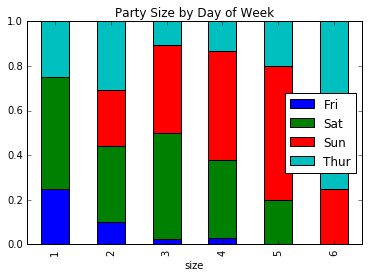

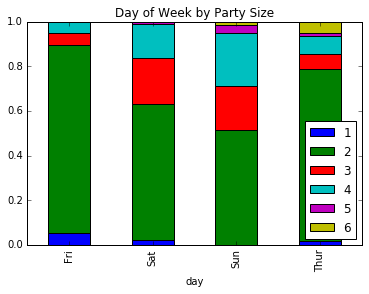

In [66]:
# Normalize the party counts on each group by the total number in each partygroup
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts.plot(kind='bar', stacked=True,title = 'Party Size by Day of Week').legend(loc='best')

party_counts_inverse = tips[['size','day','total_bill']].groupby(['day','size']).count().unstack(level='size')['total_bill'].fillna(0)
party_pcts_inverse = party_counts_inverse.div(party_counts_inverse.sum(1), axis=0)
party_pcts_inverse.plot(kind='bar', stacked=True, title = 'Day of Week by Party Size').legend(loc='best')

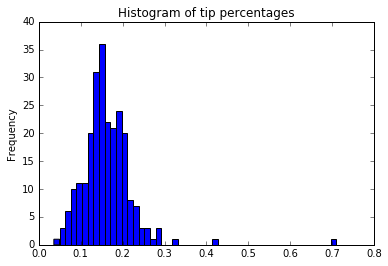

In [67]:
# Histograms and Density Plots
# Binning made easy!
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips['tip_pct'].plot(kind='hist', bins=50, title = 'Histogram of tip percentages')

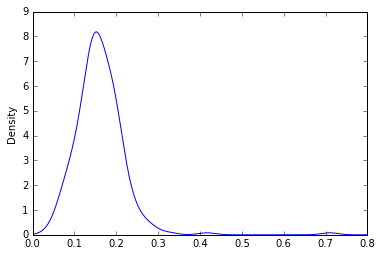

In [68]:
# Estimating with Kernel Density Plots -- linear combination of density functions that could generate the discrete plot
tips['tip_pct'].plot(kind='kde', xlim=[0,0.8])

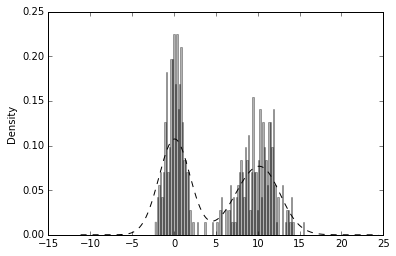

In [69]:
# KDE + Histogram on the same plot

comp1 = np.random.normal(0, 1, size=200) # N(0, 1) --> mean = 0, stdev^2 = 1
comp2 = np.random.normal(10, 2, size=200) # N(10, 4) --> mean = 0, stdev^2 = 4

values = pd.Series(np.concatenate([comp1, comp2])) # By concatenating we're making the series
values.plot(kind='hist', bins=100, alpha = 0.3, color='k', normed=True)
values.plot(kind='kde', style='k--')

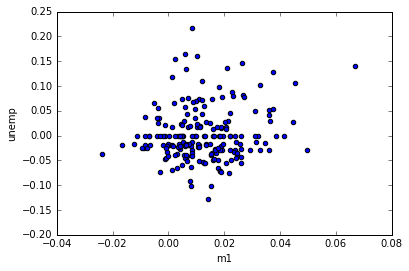

In [70]:
# Scatter Plots

macro = pd.read_csv('ch08/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data.plot.scatter(x='m1',y='unemp')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1160a5290>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12b01a590>]], dtype=object)

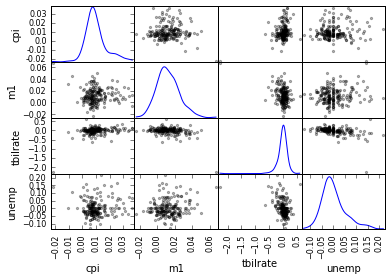

In [71]:
# Scatter Matrix -- All plots against each other
pd.scatter_matrix(trans_data, diagonal='kde', alpha = 0.3, c='k')

In [72]:
### Plotting Maps

data = pd.read_csv('ch08/Haiti.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3593 entries, 0 to 3592
Data columns (total 10 columns):
Serial            3593 non-null int64
INCIDENT TITLE    3593 non-null object
INCIDENT DATE     3593 non-null object
LOCATION          3592 non-null object
DESCRIPTION       3593 non-null object
CATEGORY          3587 non-null object
LATITUDE          3593 non-null float64
LONGITUDE         3593 non-null float64
APPROVED          3593 non-null object
VERIFIED          3593 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 280.8+ KB


In [73]:
# Quick view of some single-valued fields in the data
data[['INCIDENT DATE','LATITUDE', 'LONGITUDE']][:10]

,INCIDENT DATE,LATITUDE,LONGITUDE
0,05/07/2010 17:26,18.233333,-72.533333
1,28/06/2010 23:06,50.226029,5.729886
2,24/06/2010 16:21,22.278381,114.174287
3,20/06/2010 21:59,44.407062,8.933989
4,18/05/2010 16:26,18.571084,-72.334671
5,26/04/2010 13:14,18.593707,-72.310079
6,26/04/2010 14:19,18.482800,-73.638800
7,26/04/2010 14:27,18.415000,-73.195000
8,15/03/2010 10:58,18.517443,-72.236841
9,15/03/2010 11:00,18.547790,-72.410010


In [74]:
# The "Category" field contains a list of comma-separated, enumerated codes indicating the type of message
data['CATEGORY'][:6]

0          1. Urgences | Emergency, 3. Public Health, 
1    1. Urgences | Emergency, 2. Urgences logistiqu...
2    2. Urgences logistiques | Vital Lines, 8. Autr...
3                            1. Urgences | Emergency, 
4                            1. Urgences | Emergency, 
5                       5e. Communication lines down, 
Name: CATEGORY, dtype: object

In [75]:
# Use "describe" to see aggregations of the numerical fields in the Haiti data
print data.describe()

# Clean the data to remove lat / longs that are not in Haiti
data = data[(data.LATITUDE > 18) & (data.LATITUDE < 20) & (data.LONGITUDE > -75) & (data.LONGITUDE < -70) & data.CATEGORY.notnull()]

            Serial     LATITUDE    LONGITUDE
count  3593.000000  3593.000000  3593.000000
mean   2080.277484    18.611495   -72.322680
std    1171.100360     0.738572     3.650776
min       4.000000    18.041313   -74.452757
25%    1074.000000    18.524070   -72.417500
50%    2163.000000    18.539269   -72.335000
75%    3088.000000    18.561820   -72.293570
max    4052.000000    50.226029   114.174287


In [76]:
# Functions to parse the categories list
def to_cat_list(catstr):
    stripped = (x.strip() for x in catstr.split(','))
    return [x for x in stripped if x]

def get_all_categories(cat_series):
    '''
    Inputs: Takes in the whole cat_series
    Extracts each string and sends to to_cat_list
    Outputs: unsure
    '''
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    return sorted(set.union(*cat_sets))

def get_english(cat):
    code, names = cat.split('.')
    if '|' in names:
        names = names.split(' | ')[1]
    return code, names.strip()

In [87]:
# Create a dict to hold the English names of categories
# Create a variable for the categories

all_cats = get_all_categories(data.CATEGORY)

# Generator Expression
english_mapping = dict(get_english(x) for x in all_cats)
print english_mapping['2a']
print english_mapping['6c']
english_mapping
all_cats

Food Shortage
Earthquake and aftershocks


['1. Urgences | Emergency',
 '1a. Highly vulnerable',
 '1b. Urgence medicale | Medical Emergency',
 '1c. Personnes prises au piege | People trapped',
 '1d. Incendie | Fire',
 '2. Urgences logistiques | Vital Lines',
 "2a. Penurie d'aliments | Food Shortage",
 "2b. Penurie d'eau | Water shortage",
 '2c. Eau contaminee | Contaminated water',
 '2c. Probleme de securite | Security Concern',
 '2d. Refuge | Shelter needed',
 '2e. Penurie de carburant | Fuel shortage',
 '2f. Sans courant | Power Outage',
 '3. Public Health',
 '3a. Infectious human disease',
 '3b. Chronic care needs',
 '3c. Besoins en materiels et medicaments | Medical equipment and supply needs',
 "3d. OBGYN/Women's Health",
 '3e. Psychiatric need',
 '4. Menaces | Security Threats',
 '4a. Pillage | Looting',
 '4c. Group violence',
 '4e. Assainissement eau et hygiene | Water sanitation and hygiene promotion',
 '5. Infrastructure Damage',
 '5a. Structure effondres | Collapsed structure',
 '5b. Structures a risque | Unstable Str

In [149]:
# Add indicator columns for each category
# populate them with 1/0 based on the presence/absence of that category

## Initiliaze a data frame with the right column names

# Get the codes
#all_codes = map(lambda x: x.split('.')[0], all_cats)
def get_code(seq):
    return [x.split('.')[0] for x in seq if x]

all_codes = get_code(all_cats)
code_index = pd.Index(np.unique(all_codes))
    # np.unique creates an array out of the unique elements of the list passed.
    # pd.Index turns that into a dataframe that can be used in an Index

dummy_frame = pd.DataFrame(np.zeros((len(data),len(code_index))), index = data.index, columns = code_index)
    # len(data) says make as many rows as in the original data
    # len(code_index) says make as many columns as codes
    # np.zeros() says populate that new 2-D DataFrame with zeros
    # Create a new new data frame out of that and set the index to the index of the data
    # Name the columns after the codes
    
dummy_frame.ix[:, :20].info()
    # Show info about all rows and the first 6 columns

# Cycle through the original data and update toe dummy frame with 1 if it matches an included catgory
# See below for a zip example
for row, cat in zip(data.index, data.CATEGORY):
    codes = get_code(to_cat_list(cat))
    dummy_frame.ix[row, codes] = 1
    # codes is a list. 
    # Using ix to access a specific row and then the list of columns
    
# Create a final version of the data frame
# Using name data_to_plot so it doesn't affect the original "data" variable
data_to_plot = data.join(dummy_frame.add_prefix('category_'))
data_to_plot

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3569 entries, 0 to 3592
Data columns (total 20 columns):
1     3569 non-null float64
1a    3569 non-null float64
1b    3569 non-null float64
1c    3569 non-null float64
1d    3569 non-null float64
2     3569 non-null float64
2a    3569 non-null float64
2b    3569 non-null float64
2c    3569 non-null float64
2d    3569 non-null float64
2e    3569 non-null float64
2f    3569 non-null float64
3     3569 non-null float64
3a    3569 non-null float64
3b    3569 non-null float64
3c    3569 non-null float64
3d    3569 non-null float64
3e    3569 non-null float64
4     3569 non-null float64
4a    3569 non-null float64
dtypes: float64(20)
memory usage: 585.5 KB


,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED,...,category_7c,category_7d,category_7g,category_7h,category_8,category_8a,category_8c,category_8d,category_8e,category_8f
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4041,Radio Commerce in Sarthe,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",i'm Louinel from Sarthe. I'd to know what can ...,"5e. Communication lines down,",18.593707,-72.310079,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4040,Contaminated water in Baraderes.,26/04/2010 14:19,Marc near Baraderes,How do we treat water in areas without Pipe?\t...,"4. Menaces | Security Threats, 4e. Assainissem...",18.482800,-73.638800,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,4039,Violence at &quot;arcahaie bas Saint-Ard&quot;,26/04/2010 14:27,unable to find &quot;arcahaie bas Saint-Ard&qu...,Goodnight at (arcahaie bas Saint-Ard) 2 young ...,"4. Menaces | Security Threats,",18.415000,-73.195000,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,4038,No electricity in pernier,15/03/2010 10:58,Pernier,why the people who lives in pernier doesn't fi...,"2. Urgences logistiques | Vital Lines, 2f. San...",18.517443,-72.236841,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,4037,Shelter and food needed at Lamentin 54 and Rue...,15/03/2010 11:00,Intersection of Lamentin 54 and Rue St Juste,"GOOD EVENING ONG, I'M VERY HAPPY FOR THE AID Y...","2. Urgences logistiques | Vital Lines, 2d. Ref...",18.547790,-72.410010,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,4036,"Food needed, House collapsed in 1ere Section S...",15/03/2010 14:18,Assumed 1ere Section Salagnac and Salagnac de ...,"i'm living in Nip Department, First section sa...","1a. Highly vulnerable, 2. Urgences logistiques...",18.415000,-73.195000,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,4035,Clogged toilet in canape vert,19/03/2010 10:19,Canape Vert,Please give the message for with the concern O...,"4. Menaces | Security Threats, 4e. Assainissem...",18.539513,-72.327118,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,4034,Tent shelter and food needed on Lapot St. Carr...,22/03/2010 10:49,"unable to find street, mapped to Carrefour","We need tent, cover, rice. Uneted Nation never...","2. Urgences logistiques | Vital Lines, 2d. Ref...",18.534260,-72.408960,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
# Aside: zip example
zip(np.zeros(5), np.random.randn(5))

[(0.0, 0.95088577807225683),
 (0.0, -1.0579520428604627),
 (0.0, 0.27942928723368898),
 (0.0, 1.0331364395639784),
 (0.0, -0.1092664917040439)]

KeyError: 'category_2a'

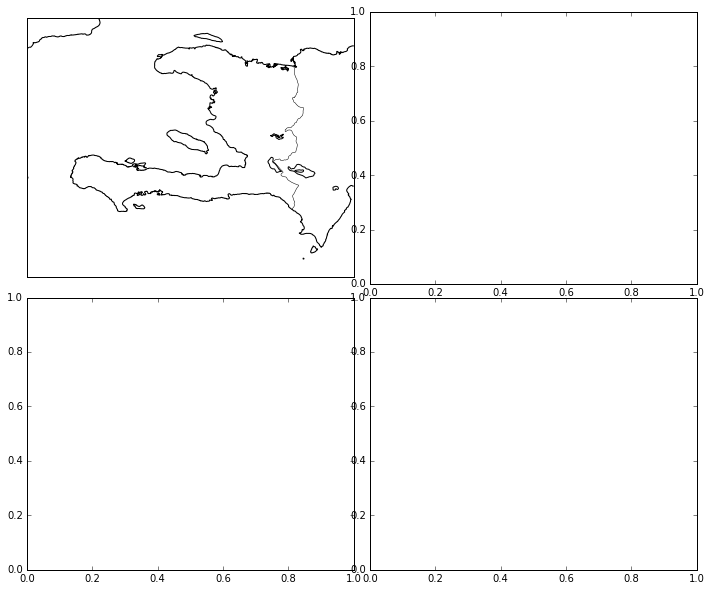

In [150]:
# Let's make maps!
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

## Had to follow steps here: 
# 1. http://aimbat.readthedocs.io/en/latest/docfiles/install_dependencies.html#installing-basemap-without-macports
# Which said basically download the basemap.tar.gz file, untar it (tar -zxvf file.tar.gz), run "python setup.py build" then "python setup.py install"
# Dd all of that in my virtualenv but it may have gotten installed onto the local computer's /usr/local 
# 2. https://pypi.python.org/pypi/basemap

def basic_haiti_map( ax = None, lllat = 17.25, urlat = 20.25, lllon =-75, urlon =-71):
    # create polar stereographic Basemap instance.
    m = Basemap( ax = ax, projection ='stere', 
                lon_0 =( urlon + lllon) / 2, 
                lat_0 =( urlat + lllat) / 2, 
                llcrnrlat = lllat, 
                urcrnrlat = urlat, 
                llcrnrlon = lllon, 
                urcrnrlon = urlon, 
                resolution ='f') 
    # draw coastlines, state and country boundaries, edge of map.
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    return m

fig, axes = plt.subplots(nrows=2, ncols = 2, figsize=(12,10))
fig.subplots_adjust(hspace = 0.05, wspace = 0.05)
to_plot = ['2a','1','3c','7a']

lllat = 17.25; urlat = 20.25; lllon = -75; urlon = -71

for code, ax in zip(to_plot, axes.flat): 
    m = basic_haiti_map(ax, lllat = lllat, urlat = urlat, lllon = lllon, urlon = urlon)
    cat_data = data[data['category_%s' % code] == 1]
    # computer map proj coordinates.
    x, y = m(cat_data.LONGITUDE.values, cat_data.LATITUTDE.values)
    m.plot(x, y, 'k.', alpha = 0.5)
    ax.set_title('%s: %s' % (code, english_mapping[code]))

plt.show()